In [1]:
from py2neo import Graph
from py2neo import Node

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from py2neo import Database
db = Database("bolt://disease.ncats.io:80")
graph = db.default_graph

## Distribution of gene variants on GARD diseases

In [4]:
q = """match p=(d:DATA)--(n:S_GARD)--(m:S_CLINVAR:Pathogenic) return d.id, n.N_Name, count(m)"""
gene_dict = graph.run(q).data()
gene_df = pd.DataFrame.from_dict(gene_dict)
gene_df.head()

,d.id,n.N_Name,count(m)
0,10900,"[HEREDITARY DIFFUSE GASTRIC CANCER, HDGC, GAST...",20
1,634,"[LEBER CONGENITAL AMAUROSIS, LCA, CONGENITAL A...",92
2,10490,"[LEBER CONGENITAL AMAUROSIS 6, LCA6, LEBER CON...",6
3,5508,"[VLCAD DEFICIENCY, VERY LONG-CHAIN ACYL-COA DE...",5
4,4017,"[OCCIPITAL HORN SYNDROME, OHS, CUTIS LAXA X-LI...",10


In [7]:
gene_df.to_csv("GARD_Gene_Variant_Distribution")
gene_df.shape

(2326, 3)

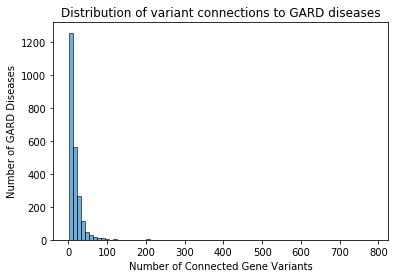

In [13]:
plt.hist(gene_df["count(m)"], bins=75, alpha = 0.6, ec = "black")
plt.xlabel("Number of Connected Gene Variants")
plt.ylabel("Number of GARD Diseases")
plt.title("Distribution of variant connections to GARD diseases")
plt.show()

In [15]:
gene_df.sort_values(by="count(m)", ascending=False)

,d.id,n.N_Name,count(m)
439,6591,"[HEMOPHILIA A, HEMOPHILIA, CLASSIC, HEM A, CLA...",786
63,5694,"[RETINITIS PIGMENTOSA, RP]",326
55,8732,"[HEMOPHILIA B, CHRISTMAS DISEASE, FACTOR IX DE...",210
1756,6233,"[CYSTIC FIBROSIS, MUCOVISCIDOSIS, CF]",204
1608,6400,"[FABRY DISEASE, ANGIOKERATOMA, DIFFUSE, ANDERS...",162
...,...,...,...
2031,8722,"[PAROXYSOMAL NONKINESIGENIC DYSKINESIA, DYT-MR-1]",1
2043,7026,"[MALIGNANT MESOTHELIOMA, MESOTHELIOMA, MALIGNANT]",1
2067,1248,"[CHARCOT-MARIE-TOOTH DISEASE TYPE 2A, CMT 2A, ...",1
2088,10598,"[CAROTID BODY TUMOR, CAROTID BODY PARAGANGLIOM...",1


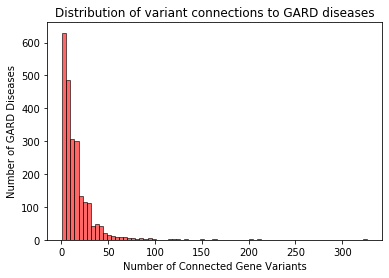

In [18]:
#showing the histogram without the 786 value so we can see more of the shape of the data
outlier_gone = gene_df.sort_values(by="count(m)", ascending=False)[1:]["count(m)"]
plt.hist(outlier_gone, bins=75, alpha = 0.6, ec = "black", facecolor = "red")
plt.xlabel("Number of Connected Gene Variants")
plt.ylabel("Number of GARD Diseases")
plt.title("Distribution of variant connections to GARD diseases")
plt.show()

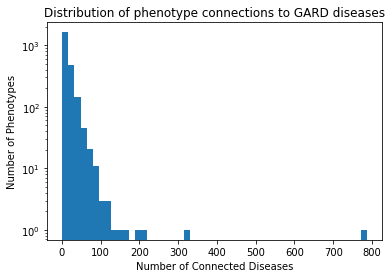

In [19]:
#power law
plt.hist(gene_df["count(m)"], bins=50, log=True)
plt.xlabel("Number of Connected Diseases")
plt.ylabel("Number of Phenotypes")
plt.title("Distribution of phenotype connections to GARD diseases")
plt.show()

In [20]:
gene_df.sort_values(by="count(m)", ascending=False)[:10]

,d.id,n.N_Name,count(m)
439,6591,"[HEMOPHILIA A, HEMOPHILIA, CLASSIC, HEM A, CLA...",786
63,5694,"[RETINITIS PIGMENTOSA, RP]",326
55,8732,"[HEMOPHILIA B, CHRISTMAS DISEASE, FACTOR IX DE...",210
1756,6233,"[CYSTIC FIBROSIS, MUCOVISCIDOSIS, CF]",204
1608,6400,"[FABRY DISEASE, ANGIOKERATOMA, DIFFUSE, ANDERS...",162
1701,1033,"[X-LINKED AGAMMAGLOBULINEMIA, BRUTON TYPE AGAM...",151
2006,5461,[CONGENITAL BILATERAL ABSENCE OF THE VAS DEFER...,135
392,5786,"[AMYOTROPHIC LATERAL SCLEROSIS, ALS, LOU GEHRI...",126
18,6291,"[DUCHENNE MUSCULAR DYSTROPHY, MUSCULAR DYSTROP...",122
87,4484,"[PRIMARY CILIARY DYSKINESIA, CILIARY DYSKINESI...",115


In [24]:
gene_df.sort_values(by="count(m)", ascending=True)[:10]

,d.id,n.N_Name,count(m)
2325,5643,"[DENTATORUBRAL-PALLIDOLUYSIAN ATROPHY, DRPLA, ...",1
576,10878,[NORMOPHOSPHATEMIC FAMILIAL TUMORAL CALCINOSIS...,1
2188,664,"[ANAPLASTIC THYROID CANCER, THYROID CANCER, AN...",1
2193,5865,"[OSTIUM SECUNDUM ATRIAL SEPTAL DEFECT, ASD OST...",1
616,7795,"[TRANSPOSITION OF THE GREAT ARTERIES, DTGA, DE...",1
132,363,"[ACATALASEMIA, CATALASE DEFICIENCY, ACATALASIA]",1
2198,10824,[ACTH-INDEPENDENT MACRONODULAR ADRENAL HYPERPL...,1
2199,6224,"[CUSHING'S SYNDROME, CUSHING SYNDROME, HYPERCO...",1
662,3089,"[KERATITIS, HEREDITARY, DOMINANTLY INHERITED K...",1
701,6704,"[HYPERLIPOPROTEINEMIA TYPE 5, HYPERLIPOPROTEIN...",1
